In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('car_fuel_efficiency.csv')
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [3]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [4]:
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
    

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB


In [6]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

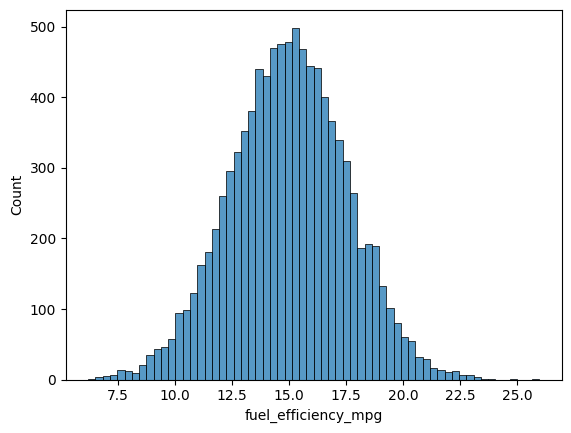

In [7]:
sns.histplot(df.fuel_efficiency_mpg)

In [8]:
df.horsepower.median()


149.0

In [9]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n-n_val-n_test
n_train, n_val, n_test

(5824, 1940, 1940)

In [10]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)


In [11]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
1696,260,139.0,2606.972984,2009,16.964054
5685,280,132.0,4004.214323,2014,10.059094
6735,210,152.0,2500.175687,2020,17.593237
2052,250,154.0,2254.313245,2002,18.925748


In [12]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [13]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values



In [14]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
5819,260,139.0,2606.972984,2009,16.964054
5820,280,132.0,4004.214323,2014,10.059094
5821,210,152.0,2500.175687,2020,17.593237
5822,250,154.0,2254.313245,2002,18.925748


In [15]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

# Fillna with mean

In [16]:
def prepare_X(df, method = df.mean()):
    df = df.fillna(method)
    X = df.values
    return X

In [17]:
def train_linear_regression(X, y):
    X = np.column_stack([np.ones(X.shape[0]), X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [18]:
def rmse(y, y_pred):
    error = y-y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [19]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
w0, w

(28.925328344990298,
 array([ 0.00012088,  0.01030315, -0.0050101 , -0.0002347 ]))

In [20]:
X_val = prepare_X(df_val)
y_pred = w0+X_val.dot(w)

error_with_mean = rmse(y_val, y_pred)

In [21]:
error_with_mean

0.4636019612132153

# Fillna with 0

In [22]:
X_train = prepare_X(df_train, method=0)
w0, w = train_linear_regression(X_train, y_train)
w0, w

(28.827365475106156,
 array([ 9.93613218e-05,  3.54221891e-03, -5.01328015e-03,  3.42992869e-04]))

In [23]:
X_val = prepare_X(df_val)
y_pred = w0+X_val.dot(w)

error_with_zero = rmse(y_val, y_pred)
error_with_zero

0.5033849489656288

# Regularized Linear Regression


In [24]:
def train_linear_regression_reg(X, y, r = 0.001):
    X = np.column_stack([np.ones(X.shape[0]), X])
    XTX = X.T.dot(X)
    
    # add reuglarization term on diagonal
    XTX = XTX + r * np.eye(XTX.shape[0])
       
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [25]:
X_train = prepare_X(df_train, method=0)
X_val = prepare_X(df_val, method=0)
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w0 + X_val.dot(w)
    
    score = round(rmse(y_val, y_pred), 2)
    print(f'Score with {r}: = {score}')

Score with 0: = 0.52
Score with 0.01: = 0.52
Score with 0.1: = 0.52
Score with 1: = 0.52
Score with 5: = 0.52
Score with 10: = 0.52
Score with 100: = 0.52


In [26]:
scores = {}
for i in range(10):
    idx = np.arange(n)
    np.random.seed(i)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values
    
    del(df_train['fuel_efficiency_mpg'])
    del(df_val['fuel_efficiency_mpg'])
    del(df_test['fuel_efficiency_mpg'])
    
    X_train = prepare_X(df_train, method=0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=0)
    
    X_val = prepare_X(df_val, method=0)
    y_pred = w0 + X_val.dot(w)
    
    score = rmse(y_val, y_pred)
    print(f'Score with {r}: = {score}')
    scores[i] = score
    

Score with 100: = 0.5206531296292951
Score with 100: = 0.5213388912860217
Score with 100: = 0.5228069974785726
Score with 100: = 0.5159516741108942
Score with 100: = 0.5109129460108117
Score with 100: = 0.5283406460133415
Score with 100: = 0.5313910658151165
Score with 100: = 0.5090670387365963
Score with 100: = 0.5147399129426932
Score with 100: = 0.5131865908408015


In [27]:
list(scores.values())

[0.5206531296292951,
 0.5213388912860217,
 0.5228069974785726,
 0.5159516741108942,
 0.5109129460108117,
 0.5283406460133415,
 0.5313910658151165,
 0.5090670387365963,
 0.5147399129426932,
 0.5131865908408015]

In [28]:
scores_std = round(np.std(list(scores.values())),3)
scores_std

0.007

# Test Model

In [29]:
df_train.shape

(5824, 4)

In [32]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

y_train = df_train.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del(df_train['fuel_efficiency_mpg'])
del(df_test['fuel_efficiency_mpg'])

r= 0.01
X_train = prepare_X(df_train, method=0)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

X_test = prepare_X(df_test, method=0)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
print(f'Score with {r}: = {score}')

Score with 0.01: = 0.5156261299167999


In [31]:
df_train.shape

(7764, 4)